# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)

<ipython-input-8-7d30c1d1d44e>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [9]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [10]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [12]:
#Q2
MissValue = df.isnull().sum()
MissValuePercent = round(100 * MissValue / len(df), 1)
MissData = pd.concat([MissValue, MissValuePercent], axis=1, keys=['missing_num', 'missing_%'])
MissData = MissData[MissData['missing_num'] > 0].sort_values(by='missing_%', ascending=False)
MissData


,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_accuracy,11466,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

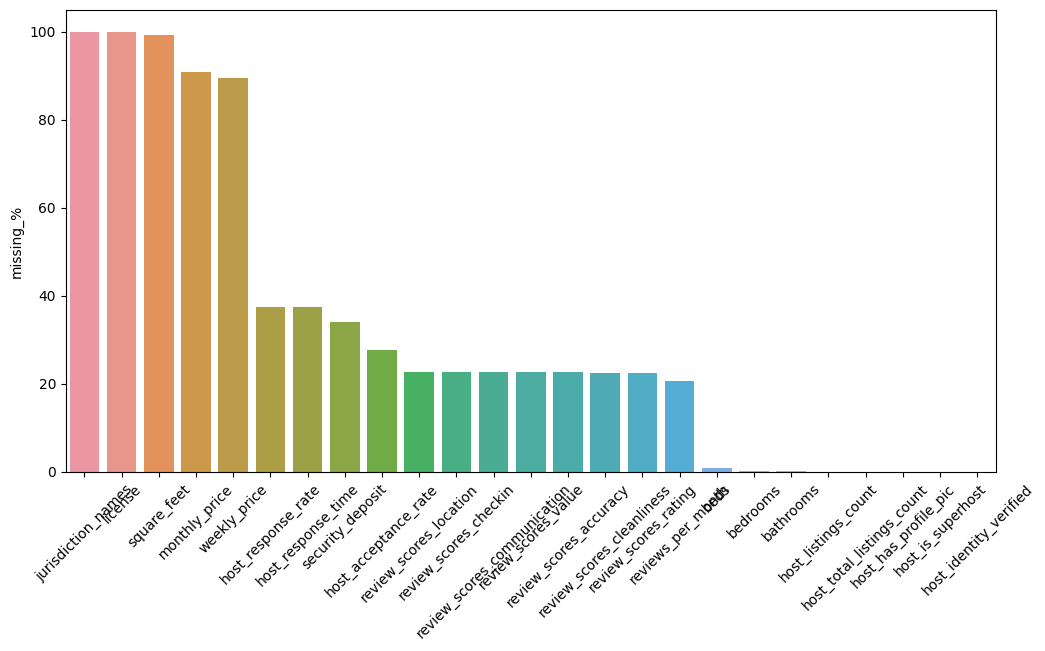

In [13]:
# Q3
MissValue = df.isnull().sum()
MissValuePercent = round(100 * MissValue / len(df), 1)
MissData = MissData[MissData['missing_num'] > 0].sort_values(by='missing_%', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=MissData.index, y=MissData['missing_%'])
plt.xticks(rotation=45)
plt.ylabel('missing_%')
plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [14]:
# Q4
beds = df[df['beds'].isnull()]
beds.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [15]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [16]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

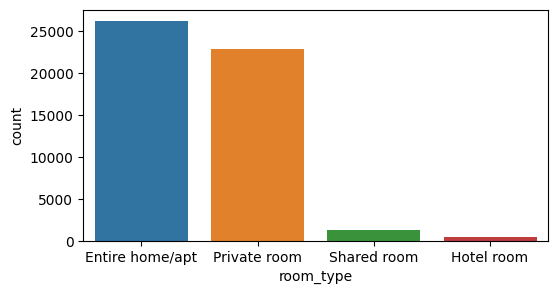

In [19]:
# Q5
RoomType = df['room_type'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=RoomType.index, y=RoomType.values)
plt.xlabel('room_type')
plt.ylabel('count')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

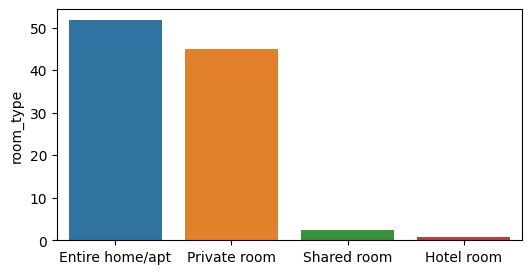

In [20]:
# Q6
RoomCount = df['room_type'].value_counts()
RoomPercent = 100 * RoomCount / len(df)
plt.figure(figsize=(6, 3))
sns.barplot(x=RoomPercent.index, y=RoomPercent.values)
plt.ylabel('room_type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

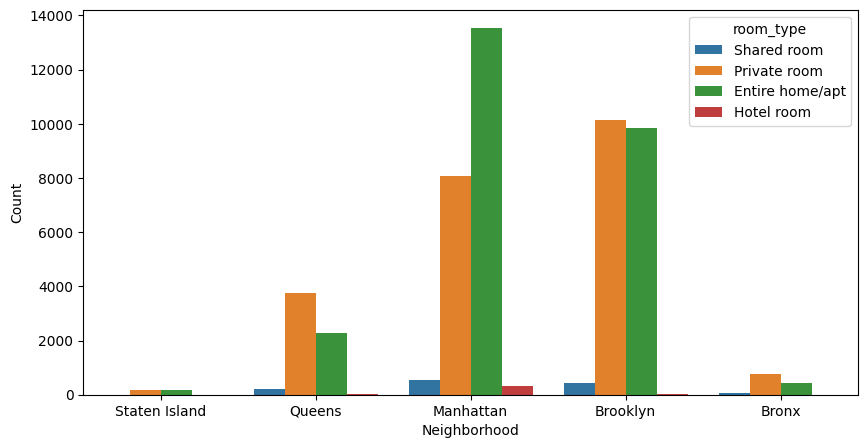

In [30]:
# Q7
neighborhood = df.groupby(['neighborhood', 'room_type']).size().reset_index(name='count')
neighborhood.sort_index(ascending=False, inplace=True)
plt.figure(figsize=(10, 5))
text = sns.barplot(x='neighborhood', y='count', hue='room_type', data=neighborhood)
plt.xlabel('Neighborhood')
plt.xticks(rotation=0)
plt.ylabel('Count')

plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

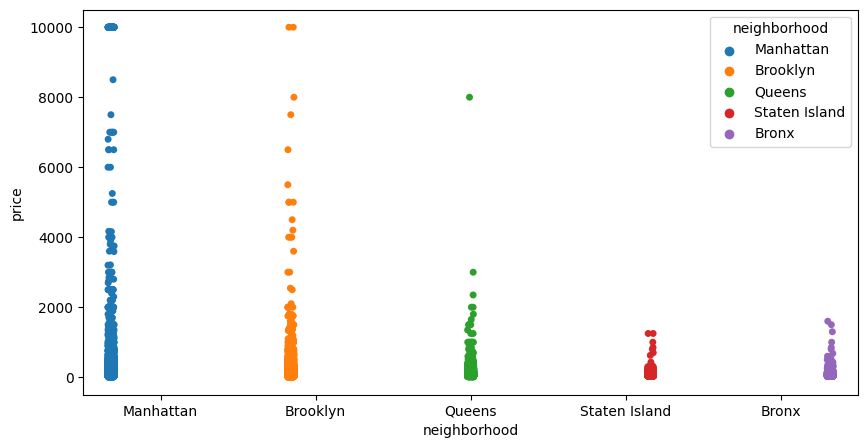

In [43]:
# Q8
plt.figure(figsize=(10, 5))
ax = sns.stripplot(x='neighborhood', y='price', hue='neighborhood', data=df, jitter=True, dodge=True)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.show()


- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
'''
맨해튼과 브루클린은 나머지 세 도시에 비해 상당히 발전된 도시다.
객관적인 집(방)의 수가 앞의 세 도시에 비해 명확히 많은데도 집값이 높다는 뜻은
그만큼 해당 도시에 대한 수요가 상당하다는 것을 알 수 있다.
맨해튼과 브루클린의 집값 평균은 비교적 높지만 나머지 세 도시는 그렇지 않기 때문이다.
'''

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

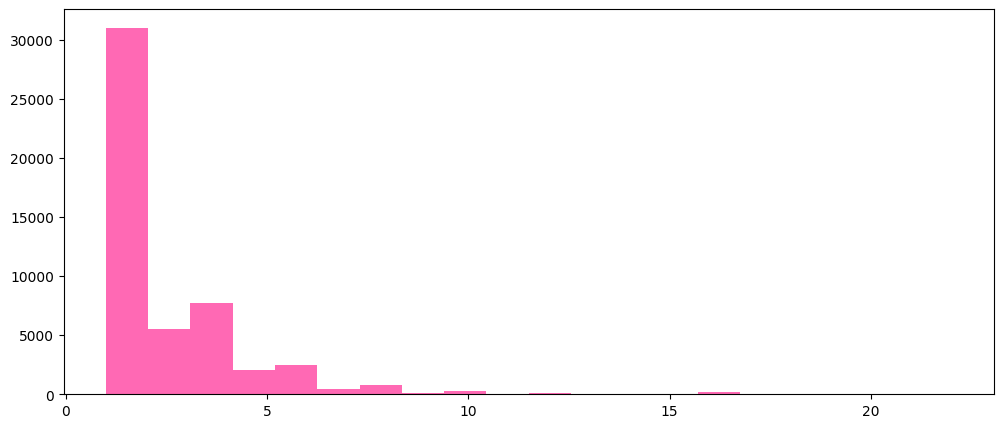

In [46]:
# Q10
plt.figure(figsize=(12, 5))
plt.hist(df['accommodates'], bins=20, color='hotpink')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

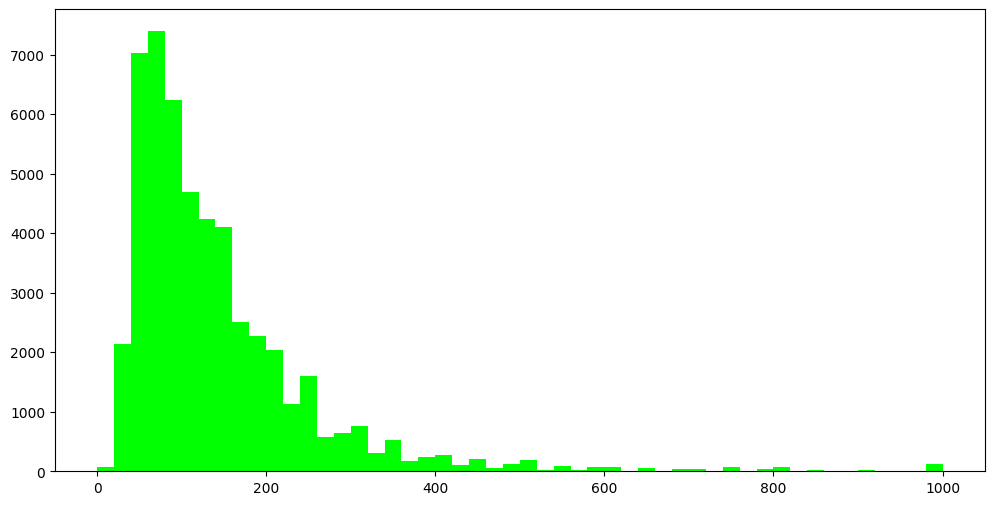

In [49]:
# Q11
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, range=(0, 1000), color='lime')

plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [ ]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [53]:
#Q12
TotalRow = len(df)

for column in df.columns:
    MissRow = df[column].isna().sum()
    MissPercent = (MissRow / TotalRow) * 100

    if MissPercent >= 25:
        df.drop(column, axis=1, inplace=True)
    elif 10 <= MissPercent < 25:
        df = df[df[column].notna()]
    elif MissPercent < 10:
        Median = df[column].median()
        df[column].fillna(Median, inplace=True)

display(df)

0            2060
1            2595
2            3831
3            5099
4            5114
           ...   
50791    42890680
50792    42890730
50793    42891018
50794    42891637
50795    42892717
Name: id, Length: 50796, dtype: int64
0        f
1        f
2        f
3        f
4        f
        ..
50791    f
50792    f
50793    f
50794    f
50795    f
Name: host_is_superhost, Length: 50796, dtype: object


TypeError: ignored

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [ ]:
#Q13-1)
'''
host_is_superhost의 결측치 중에서 실수로 대체될 수 없는 문자열이 있으므로
이를 특정한 숫자로 바꿀 것이다.
'''

In [ ]:
#Q13-2)


In [ ]:
#Q13-3)


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
